In [30]:
# df = []
# for user in users_data:
#     if user['followers'] or user['followings']:
#         df.append(user)

# with open("../data/relations.json", "w", encoding="utf-8") as json_file:
#     json.dump(df, json_file, ensure_ascii=False, indent=4)  # , default=str

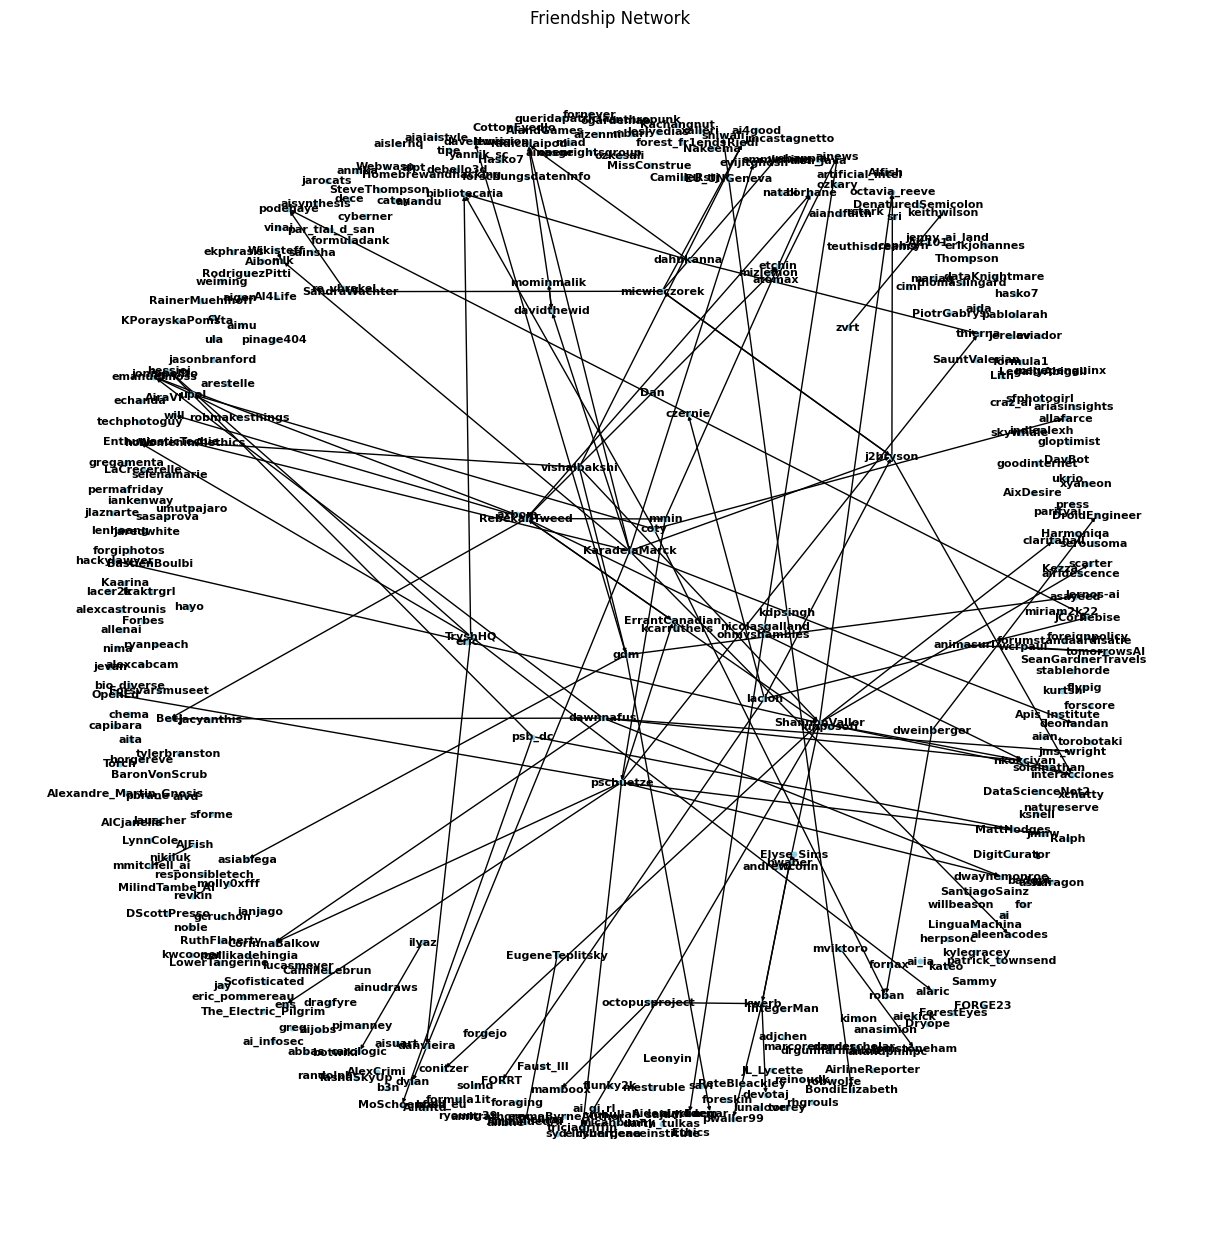

In [34]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Open the JSON file in read mode
with open("../data/data.json", "r") as json_file:
    data = json.load(json_file)

# Initialize a directed graph for the Friendship Network
G = nx.DiGraph()

# Add nodes (users) to the graph
for user in data:
    username = user['username']
    G.add_node(username)

# Add directed edges based on follower and followee relationships
for user in data:
    username = user['username']
    followings = user['followings']  # Assuming 'followings' contains user IDs being followed
    for following_user_id in followings:
        following_user = next((x for x in data if x['id'] == following_user_id), None)
        if following_user:
            following_username = following_user['username']
            G.add_edge(username, following_username)

# Visualize the Friendship Network (optional)
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_size=10, node_color='skyblue', with_labels=True, font_size=8, font_color='black', font_weight='bold', arrowsize=5)
plt.title("Friendship Network")
plt.show()
